<a href="https://colab.research.google.com/github/ingus-t/SPAI/blob/master/Notes/Chest_xrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

**Dataset on Kaggle** https://www.kaggle.com/nih-chest-xrays/data  
**CSV file:** https://nihcc.app.box.com/v/ChestXray-NIHCC/file/219760887468  
**Research document for this dataset:** *ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases* https://arxiv.org/abs/1705.02315

**Class count for images with only 1 class:**
```
No Finding              60361
Infiltration            9547
Atelectasis             4215
Effusion                3955
Nodule                  2705
Pneumothorax            2194
Mass                    2139
Consolidation           1310
Pleural_Thickening      1126
Cardiomegaly            1093
Emphysema                892
Fibrosis                 727
Edema                    628
Pneumonia                322
Hernia                   110
```

**Total count for all classes**
```
No_Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
```

**Accuracy achieved by transfer learning, using Resnet50 model by paper authors**
```
Atelectasis     0.7069
Cardiomegaly    0.8141
Effusion        0.7362
Infiltration    0.6128
Mass            0.5609
Nodule          0.7164
Pneumonia       0.6333
Pneumothorax    0.7891
```



# Script to download all 45 GB of images (no longer needed)
- **no longer needed**. Download from Kaggle if you want the dataset locally  
- Original function was for Python 2. In Python 3 **urlretrieve** method is moved to **request** module.  
- **Run this on your PC**, not on Colab :)

In [0]:
# Download the 56 zip files in Images_png in batches
import urllib.request

# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
	  'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
	  'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
	  'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
	  'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
	  'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
	  'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
	  'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]

for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print ('downloading', fn, '...')
    urllib.request.urlretrieve(link, fn)  # download the zip file
print ("Download complete. Please check the checksums")

# !!! Sample n images per class and copy to separate folders !!!

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shutil
import os
from google.colab import files

In [0]:
df = pd.read_csv("/content/Data_Entry_2017.csv") 

In [0]:
df.head(20)

In [0]:
df.shape

In [0]:
df.describe

In [0]:
df.dtypes

In [0]:
# class distribution
# not what we need, it considers 'Hernia|Infiltration|Nodule' as 1 class, but it is actually 3.
# This gives us a total of 836 different class combinations :)

#df['Finding Labels'].value_counts()

In [0]:
# find all instances of Hernia or any other condition

#df[df['Finding Labels'] == 'Hernia'].shape[0]

In [0]:
# Find class distribution for all 15 classes: 

#df['Finding Labels'] = df['Finding Labels'].str.replace('No Finding','No_Finding')
#df['Finding Labels'] = df['Finding Labels'].str.replace('|',' ')
#df['Finding Labels'].str.split(expand=True).stack().value_counts()

In [0]:
all_classes = ['Cardiomegaly', 'No_Finding', 'Hernia', 'Infiltration', 'Nodule',
           'Emphysema', 'Effusion', 'Atelectasis', 'Pleural_Thickening',
           'Pneumothorax', 'Mass', 'Fibrosis', 'Consolidation', 'Edema',
           'Pneumonia']

chosen_classes = ['Cardiomegaly', 'No Finding', 'Emphysema', 'Effusion', 'Atelectasis', 'Pleural_Thickening', 'Nodule','Edema']

# create the 8 new folders, 1 per chosen class
for i in range(0, len(chosen_classes)):
  print(chosen_classes[i])
  os.makedirs(str(chosen_classes[i]))

In [0]:
# SAMPLING FUNCTION
# Distribution: 400, 100, 100 - not needed, 
# resizing                    - not needed, done on my PC with magick tool

# take only the 2 columns we need
df1 = df[['Image Index','Finding Labels']]

# sample n random images from a specific class, resize them, and copy to train/test/valid folders
def sample_images(df1, class_name, folder, count):
  df_test = df1[df1['Finding Labels'] == class_name]
  df_test = df_test.sample(n = count)
  df_test = df_test[['Image Index']]
  image_names = df_test.values

  for i in range(0, count):

    #folder = ""
    #if i < 2:
    #  folder = "train/" + class_name + "/"
    #elif i < 3:
    #  folder = "test/"
    #else:
    #  folder = "valid/"
    
    copy_from = "scans/256x256/"
    copy_to   = "scans/256x256/" + class_name + "/"
    # copy images to the folder
    
    #shutil.copy(os.path.join(copy_from, image_names[i]), os.path.join(copy_to, image_names[i]))
    print(copy_from, copy_to)

    pass
  print("---")

# sample 8 classes
for j in range(0, len(classes2)):
  print(j, classes2[j], classes2[j])
  sample_images(df1, classes2[j], classes2[j], 20)

###Download labels/image names as csv

In [0]:
df1.to_csv('labels.csv') 
files.download('labels.csv')

# Class distribution: single class images vs multi-class images

In [0]:
# name, occurences as the only class, total occurences (including multi-class images)
distribution=[
  ["No Finding",        60361,60361],
  ["Infiltration",      9547, 19894],
  ["Atelectasis",       4215, 11559],
  ["Effusion",          3955, 13317],
  ["Nodule",            2705, 6331],
  ["Pneumothorax",      2194, 5302],
  ["Mass",              2139, 5782],
  ["Consolidation",     1310, 4667],
  ["Pleural_Thickening",1126, 3385],
  ["Cardiomegaly",      1093, 2776],
  ["Emphysema",         892,  2516],
  ["Fibrosis",          727,  1686],
  ["Edema",             628,  2303],
  ["Pneumonia",         322,  1431],
  ["Hernia",            110,  227],
]

# put data in arrays so I can use them for x, y in matplotlib
conditions, occurence_single, occurence_total, ratio = [], [] , [], []
for i in range(0, len(distribution)):
  conditions.append(distribution[i][0])
  occurence_single.append(distribution[i][1])
  occurence_total.append(distribution[i][2])
  ratio.append(distribution[i][2] / distribution[i][1])

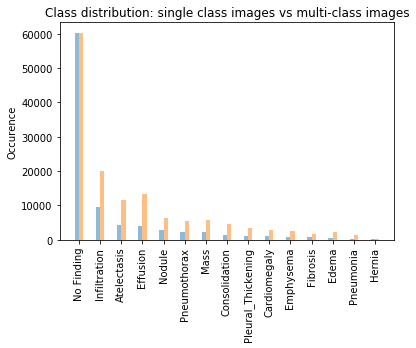

In [0]:
x_labels = np.arange(len(conditions))

indices = range(len(conditions))
width = np.min(np.diff(indices))/5.

plt.bar(indices-width/2., occurence_single, width, align='center', alpha=0.5)
plt.bar(indices+width/2., occurence_total,  width, align='center', alpha=0.5)
#plt.bar(indices+width/0.65, occurence_total, width, align='center', alpha=0.5)

plt.xticks(x_labels, conditions, rotation='vertical')
plt.ylabel('Occurence')
plt.title('Class distribution: single class images vs multi-class images')

plt.show()

# Condition occurence
How likely the condition is to appear as the only condition, or together with others  
1 means it only appears by itself, as the only class  
Bigger number means the class is more likely to appear in multi-class images.

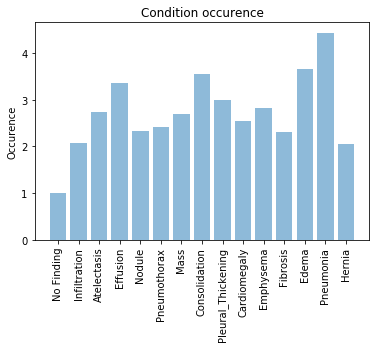

In [0]:
x_labels = np.arange(len(conditions))
plt.bar(conditions, ratio, align='center', alpha=0.5)
plt.xticks(x_labels, conditions, rotation='vertical')
plt.ylabel('Occurence')
plt.title('Condition occurence')
plt.show()

In [0]:
df['Age'].sort_values(ascending=False).head(20)

In [0]:
import PIL
from PIL import Image
import numpy as np

In [0]:
image = Image.open('/content/00005717_000.png')

np.array(image).shape

#type(image)



(1024, 1024, 4)